In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries for Model Bulding

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score,classification_report

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.kneighbours import KNearestClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV


# Explore data

In [3]:
df =pd.read_csv("heart.csv")

In [4]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Exploring Heart Data using the "heart.csv" Dataset
### This dataset provides various information about patients, including age, gender, blood pressure, cholesterol levels, electrocardiographic (ECG)      ### features, and more.

# This dataset includes the following features:

### age: The age of the patient.
### sex: Gender of the patient (0: female, 1: male).
### ca ; number of major vessels(0-4)
### cp: Type of chest pain.
     ####  . 0 : typical angina
     ####  . 1 : atypical angina
     ####  . 2 : non-angna pain
     ####  . 3 : asympotomic
### trestbps: Resting blood pressure(in mm Hg).
### chol: Serum cholesterol in mg/dl fected via BMI sensor.
### fbs: (Fasting blood sugar > 120 mg/dl)(1 = true , 0 = false)
### restecg: Resting electrocardiographic results.
        ####  .  0 : normal
        ####  .  1 : having ST-T wave abnomelity (T wave inversions and/or ST elevation or depression of > 0.05 mV)
        ####  .  2 : Showing probable or define left ventricular hypertrophy by Estes criteria
### thalach: Maximum heart rate achieved.
### exang: Exercise induced angina ( 1 = Yes , 0 =No).
### oldpeak: ST depression induced by exercise relative to rest
### Target : 0 =less chance of heart attack  1 = more chance of heart attack

In [7]:
# Size ofDataset
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [10]:
# Check null Values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# chack duplicted values
print("duplicates values in data -->> " ,df.duplicated().sum())

duplicates values in data -->>  1


In [12]:
# droop duplicates values
df.drop_duplicates(inplace =True)

In [13]:
# Find correlation between all feature
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


# Data Analysis and Visualizations

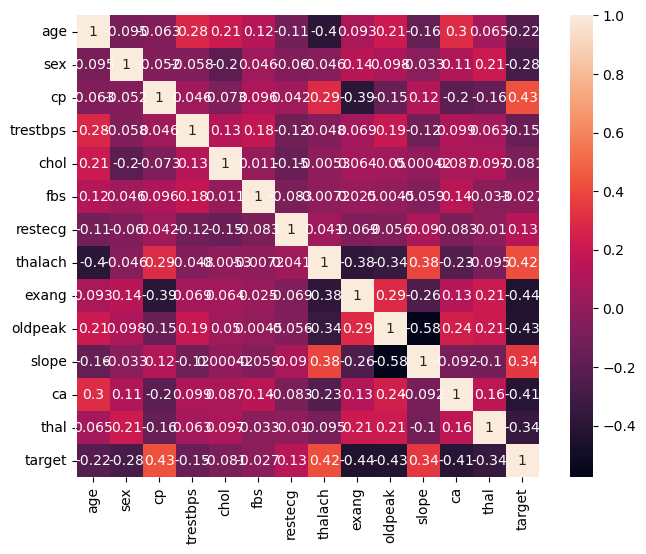

In [15]:
# Using Graph Find Correlation
plt.figure(figsize = (8 ,6))
sns.heatmap(df.corr() ,annot = True ,square = True)
plt.show()

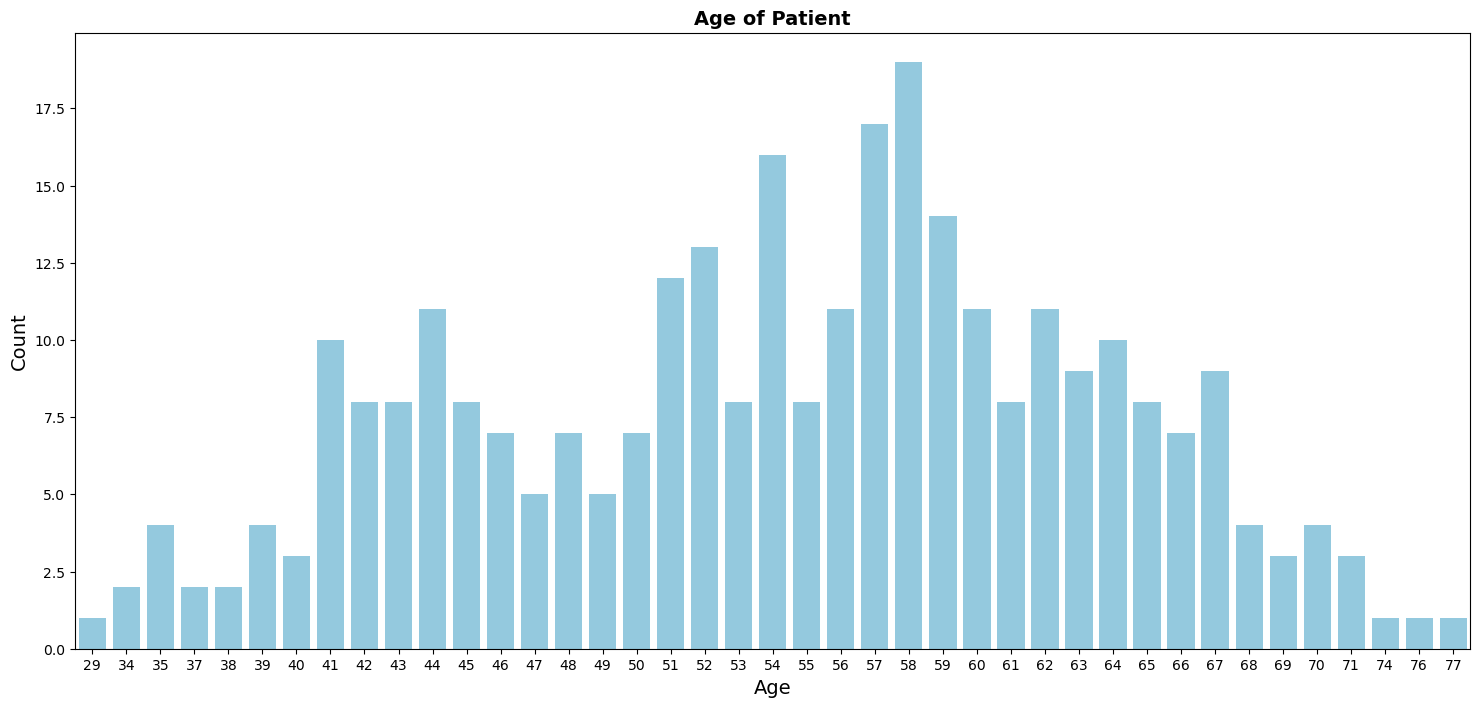

In [16]:
# countplot for age

plt.figure(figsize=(18,8))
sns.countplot(x = "age" , data =df,color='skyblue') 
# Set title and labels
plt.title("Age of Patient" , fontweight = "bold" ,fontsize = 14)
plt.xlabel("Age" , fontsize = 14)
plt.ylabel("Count" , fontsize = 14)

plt.show()

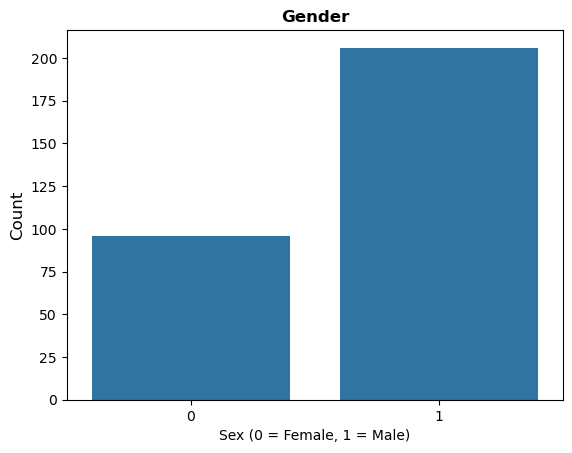

In [17]:
sns.color_palette("tab10")
sns.countplot(x = "sex" ,  data =df ,color='brown' , alpha=0.7)

# Add a title and labels
plt.title("Gender" , fontweight = "bold" ,fontsize = 12)
plt.xlabel("Sex (0 = Female, 1 = Male)" , fontsize = 10)
plt.ylabel("Count" , fontsize = 12)

plt.show()

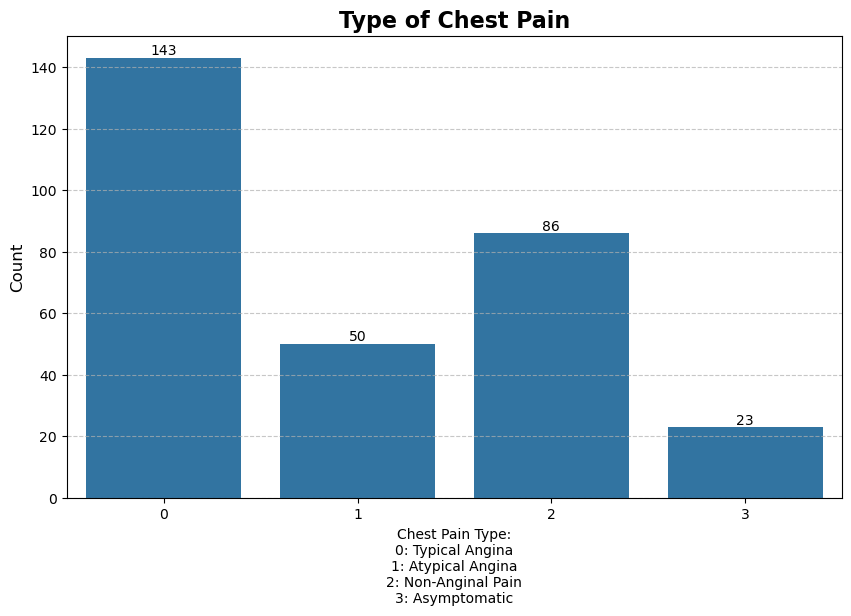

In [18]:
# Set a figure size
plt.figure(figsize=(10, 6))

ax = sns.countplot(x="cp", data=df , color='yellow',alpha=0.7)

# Add a title and labels
plt.title("Type of Chest Pain", fontweight="bold", fontsize=16)  # Title of the plot
plt.xlabel("Chest Pain Type:\n0: Typical Angina\n1: Atypical Angina\n2: Non-Anginal Pain\n3: Asymptomatic", fontsize=10)  # X-axis label
plt.ylabel("Count", fontsize=12)  # Y-axis label


# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.show()

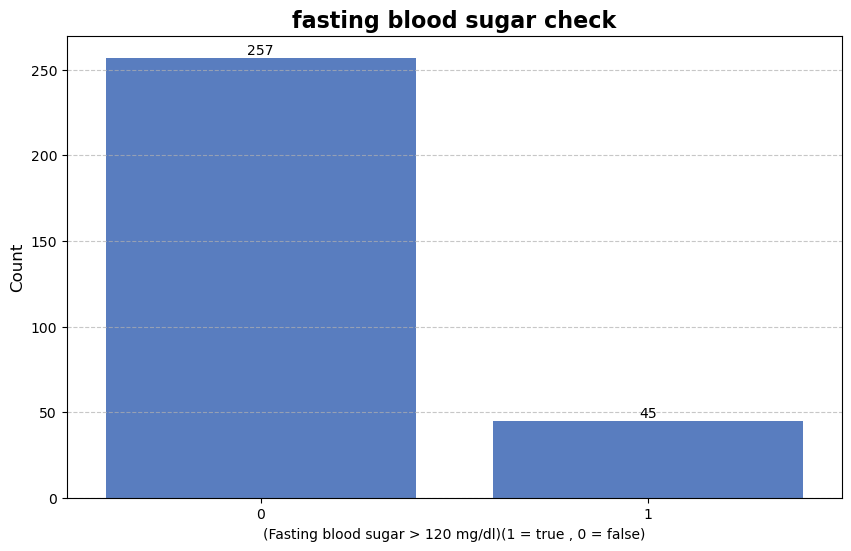

In [19]:
# Set a figure size
plt.figure(figsize=(10, 6))

sns.set_palette("muted")  
ax = sns.countplot(x="fbs", data=df)

# Add a title and labels
plt.title("fasting blood sugar check", fontweight="bold", fontsize=16)  # Title of the plot
plt.xlabel("(Fasting blood sugar > 120 mg/dl)(1 = true , 0 = false)", fontsize=10)  # X-axis label
plt.ylabel("Count", fontsize=12)  # Y-axis label


# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.show()

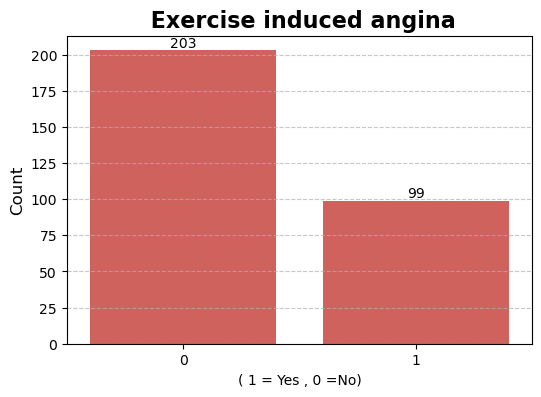

In [20]:
# Set a figure size
plt.figure(figsize=(6, 4))

sns.set_palette("Spectral")  
ax = sns.countplot(x="exang", data=df)

# Add a title and labels
plt.title(" Exercise induced angina", fontweight="bold", fontsize=16)  # Title of the plot
plt.xlabel("( 1 = Yes , 0 =No)", fontsize=10)  # X-axis label
plt.ylabel("Count", fontsize=12)  # Y-axis label


# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.show()

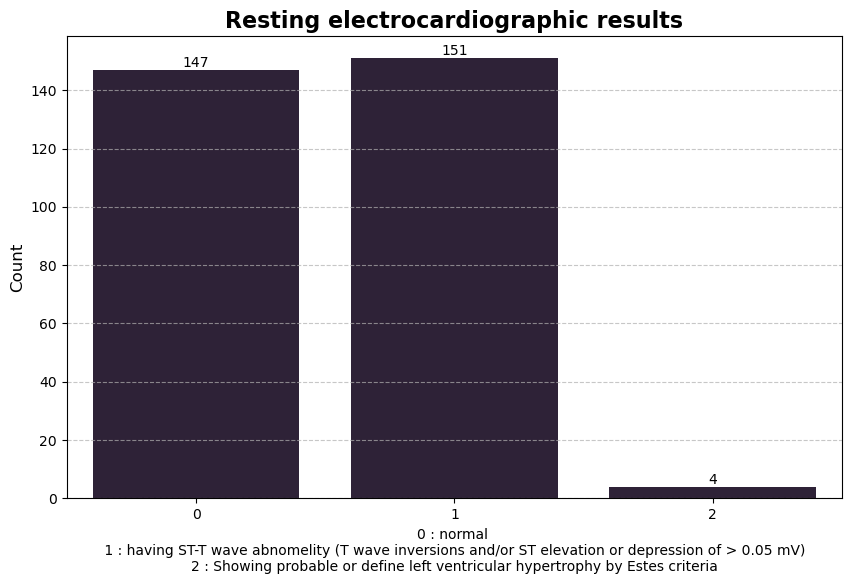

In [21]:
# Set a figure size
plt.figure(figsize=(10, 6))

sns.set_palette("mako")  
ax = sns.countplot(x="restecg", data=df)

# Add a title and labels
plt.title("Resting electrocardiographic results", fontweight="bold", fontsize=16)  # Title of the plot
plt.xlabel("0 : normal \n 1 : having ST-T wave abnomelity (T wave inversions and/or ST elevation or depression of > 0.05 mV) \n2 : Showing probable or define left ventricular hypertrophy by Estes criteria", fontsize=10)  # X-axis label
plt.ylabel("Count", fontsize=12)  # Y-axis label


# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=10)

plt.show()

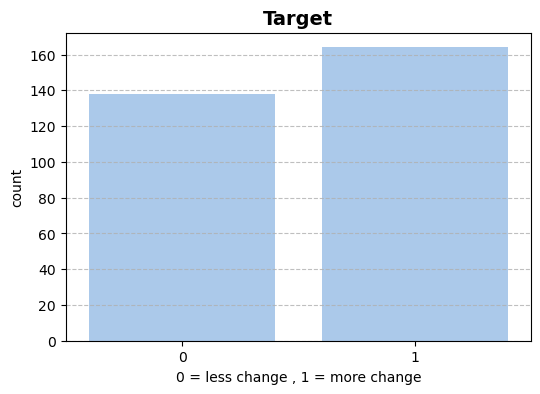

In [22]:
sns.set_palette("pastel")

plt.figure(figsize = (6,4))

sns.countplot(x="target" , data =df)
# set title ad label
plt.title("Target" , fontweight = "bold" , fontsize =14)
plt.xlabel("0 = less change , 1 = more change")
plt.grid(axis = "y" , linestyle = "--" , alpha = 0.8)

plt.show()

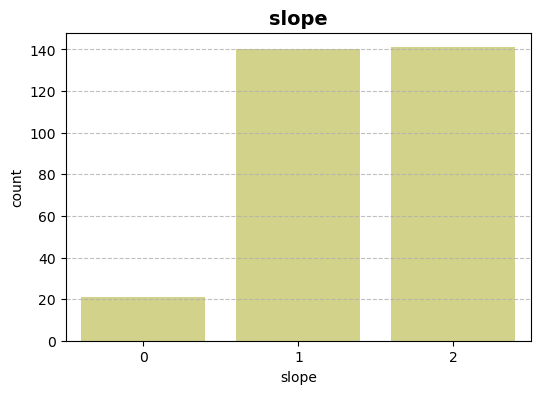

In [23]:
plt.figure(figsize = (6,4))

sns.countplot(x="slope" , data =df , color="y" ,alpha =0.5)
# set title ad label
plt.title("slope" , fontweight = "bold" , fontsize =14)

plt.grid(axis = "y" , linestyle = "--" , alpha = 0.8)

plt.show()

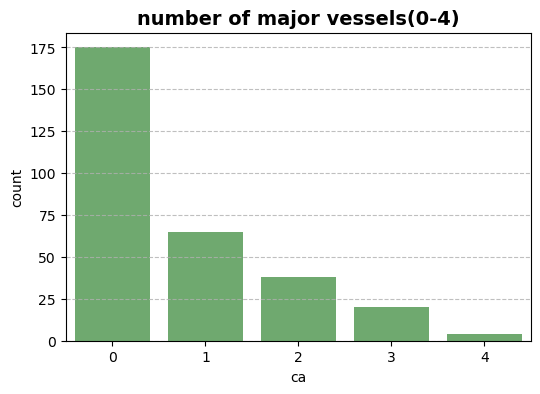

In [24]:
sns.set_palette("pastel")

plt.figure(figsize = (6,4))

sns.countplot(x="ca" , data =df ,color="g" , alpha=0.6)
# set title ad label
plt.title("number of major vessels(0-4)" , fontweight = "bold" , fontsize =14)

plt.grid(axis = "y" , linestyle = "--" , alpha = 0.8)

plt.show()

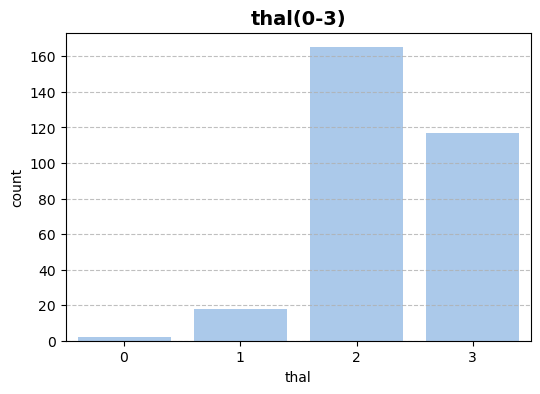

In [25]:
sns.set_palette("pastel")

plt.figure(figsize = (6,4))

sns.countplot(x="thal" , data =df)
# set title ad label
plt.title("thal(0-3)" , fontweight = "bold" , fontsize =14)

plt.grid(axis = "y" , linestyle = "--" , alpha = 0.8)

plt.show()

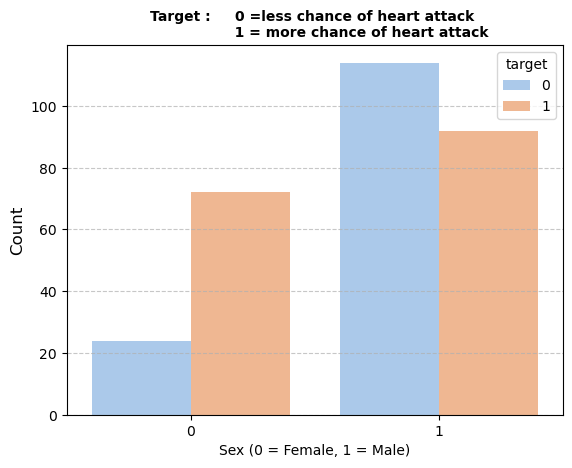

In [26]:
sns.set_palette("pastel")
sns.countplot(x = "sex" ,hue ="target" , data =df)

plt.title("Target :     0 =less chance of heart attack \n                   1 = more chance of heart attack" ,fontsize = 10 , fontweight ="bold")
plt.xlabel("Sex (0 = Female, 1 = Male)" , fontsize = 10 )
plt.ylabel("Count" , fontsize = 12)

plt.grid(axis="y" , linestyle = "--" , alpha = 0.7)
plt.show()

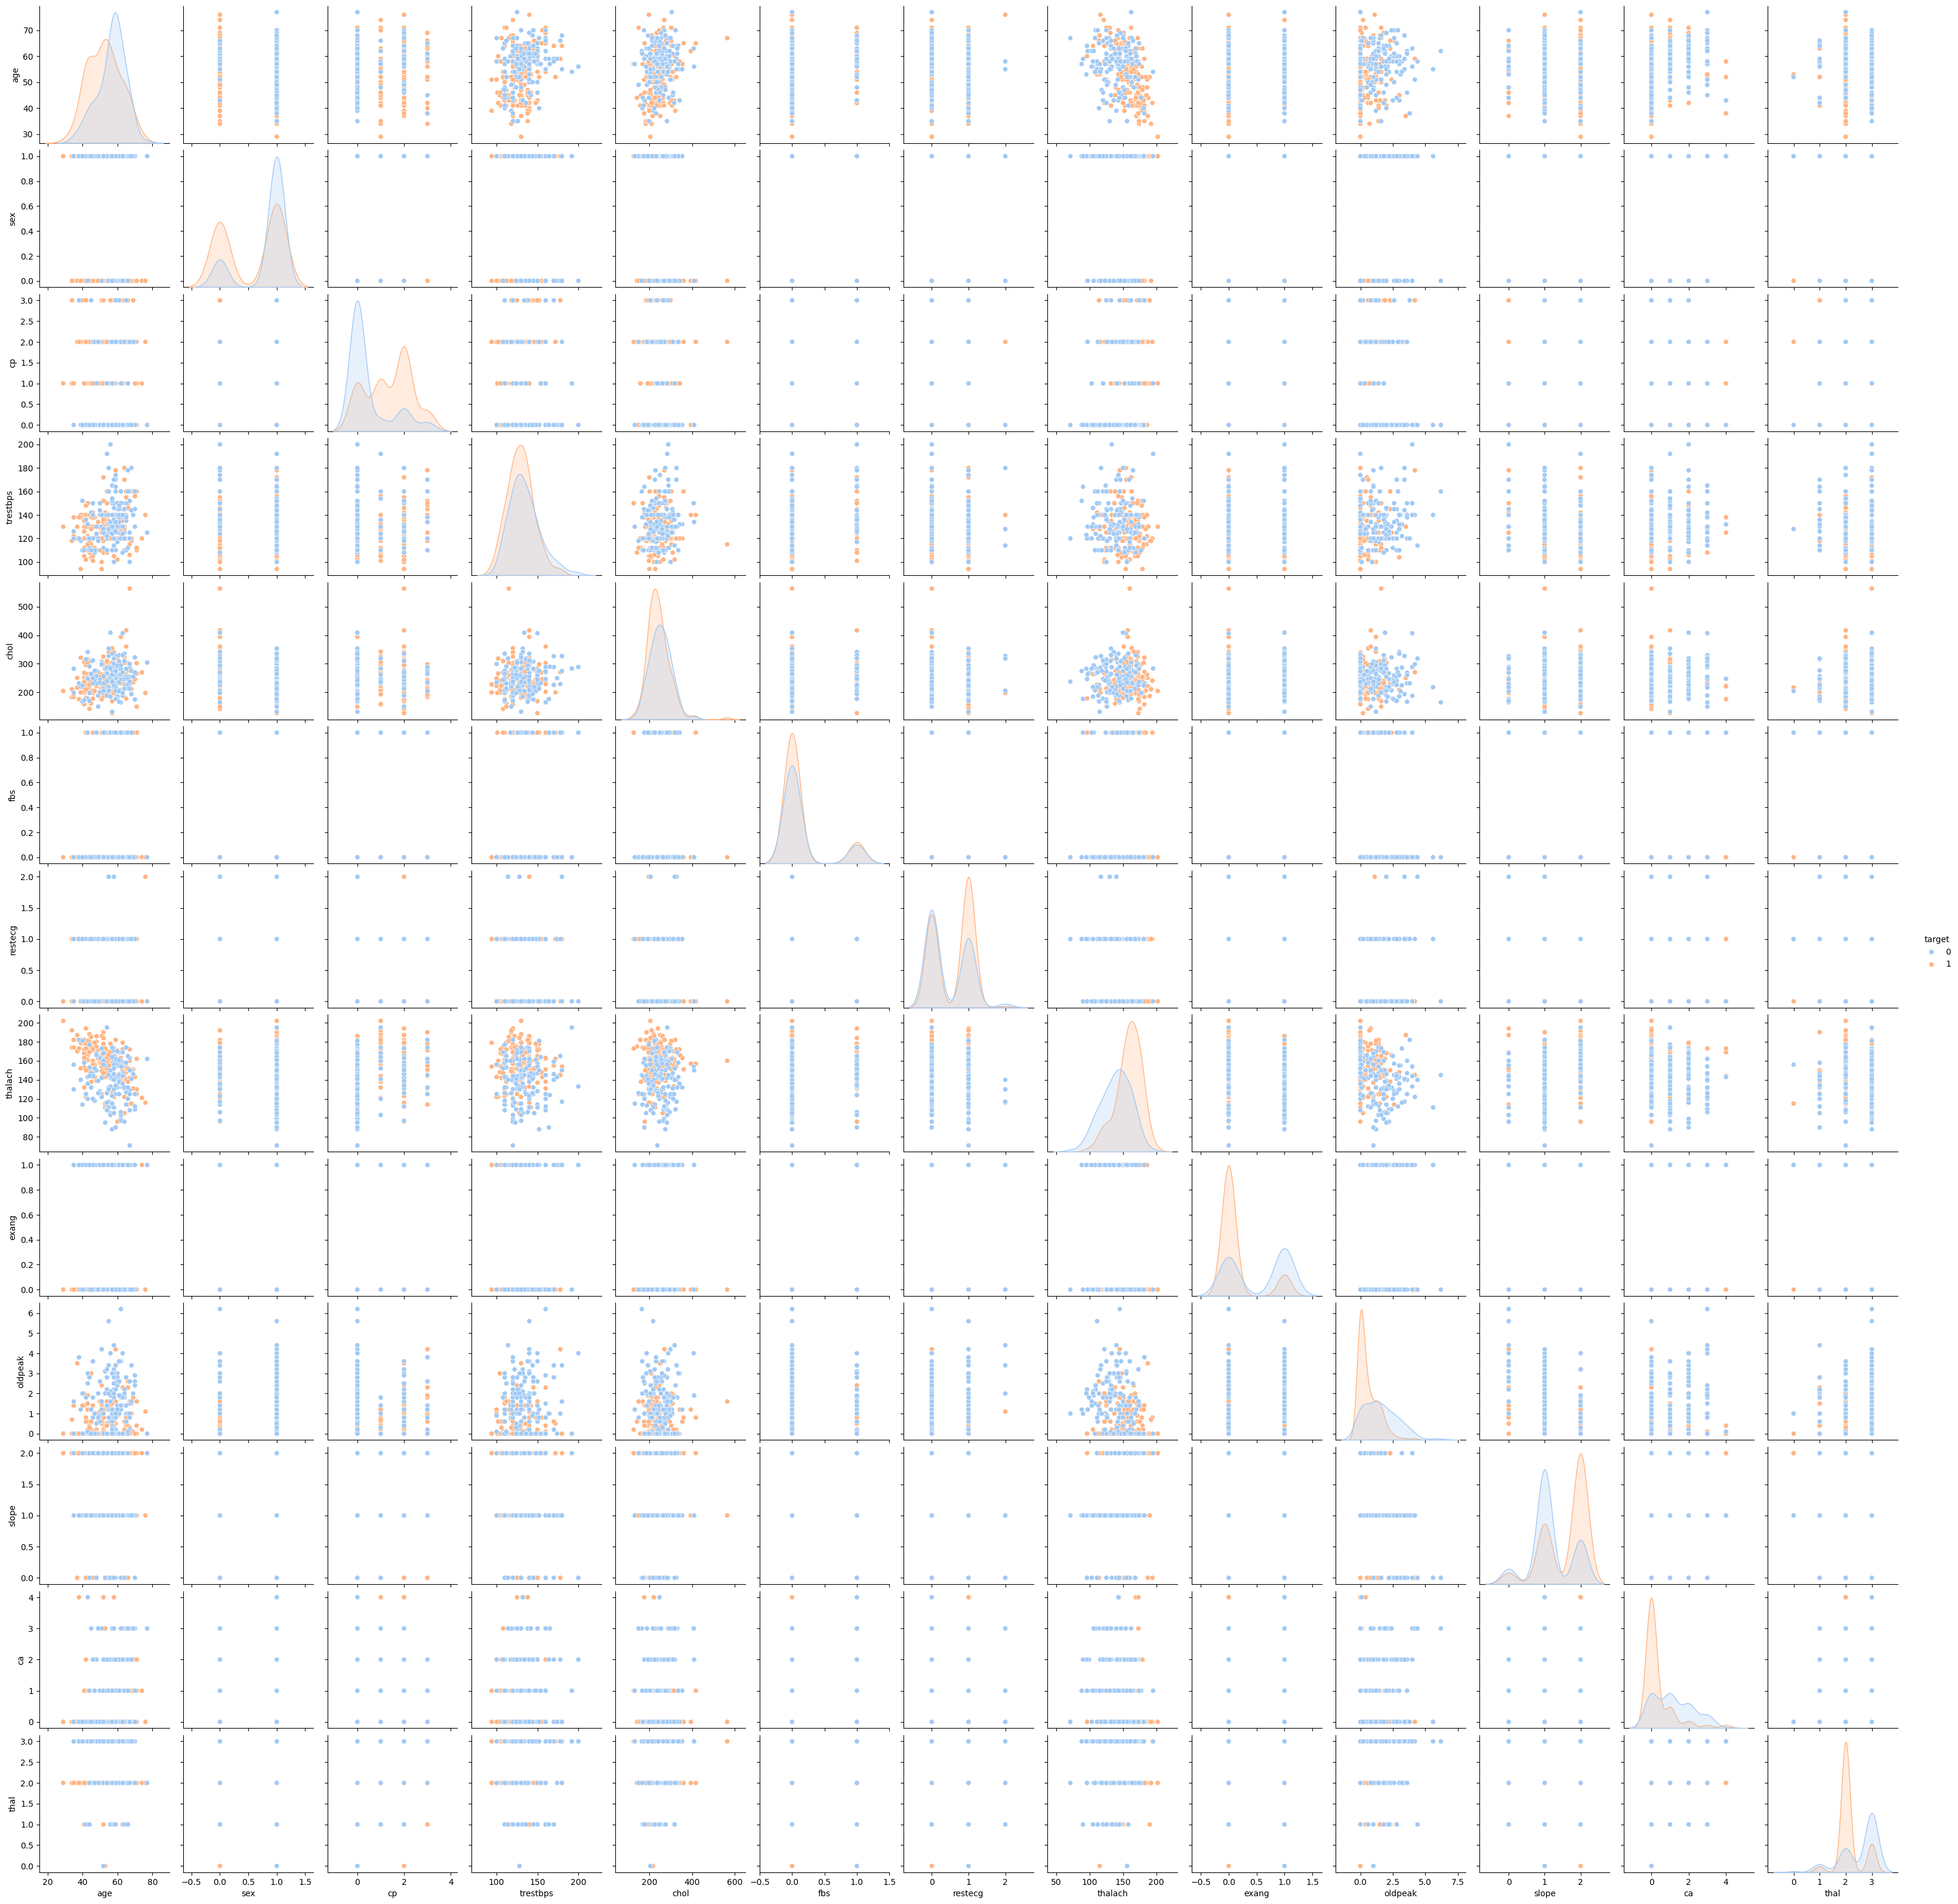

In [27]:
sns.pairplot(df , hue="target")
plt.show()

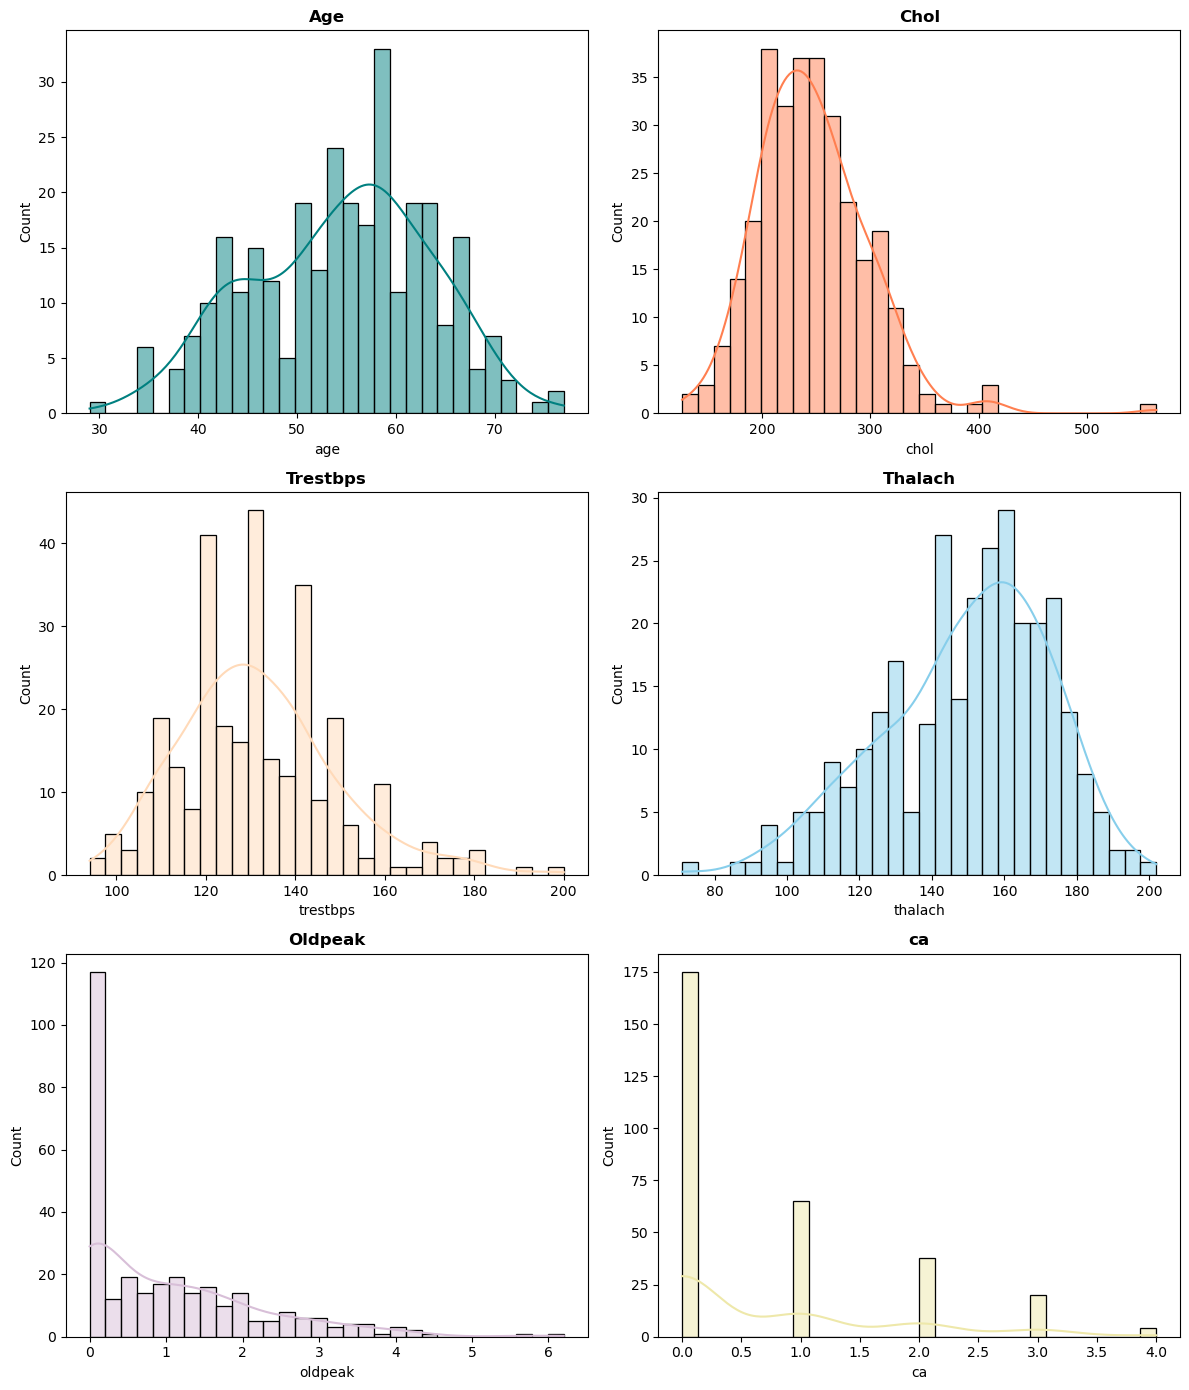

In [28]:
# set fig size
plt.figure(figsize=(12,14))

# plot for Age
plt.subplot(3,2,1)
sns.histplot(df["age"] , kde = True , color = "teal" , bins = 30)
plt.title("Age" , fontweight = "bold")

# plot for chol
plt.subplot(3,2,2)
sns.histplot(df["chol"] , kde = True ,color = "#FF7F50" , bins = 30)
plt.title("Chol" , fontweight = "bold")

# plot for trestbps
plt.subplot(3,2,3)
sns.histplot(df["trestbps"] , kde = True , color = "#FFDAB9" ,  bins = 30)
plt.title("Trestbps" , fontweight = "bold")

# plot for thalach
plt.subplot(3,2,4)
sns.histplot(df["thalach"] , kde = True ,color = "#87CEEB" , bins = 30)
plt.title("Thalach" , fontweight = "bold")

# plot for oldpeak
plt.subplot(3,2,5)
sns.histplot(df["oldpeak"] , kde = True ,color = "#D8BFD8" , bins = 30 )
plt.title("Oldpeak" , fontweight = "bold")

# plot for ca
plt.subplot(3,2,6)
sns.histplot(df["ca"] , kde = True , color = '#EEE8AA' , bins = 30)
plt.title("ca" , fontweight = "bold")

plt.tight_layout()
plt.show()

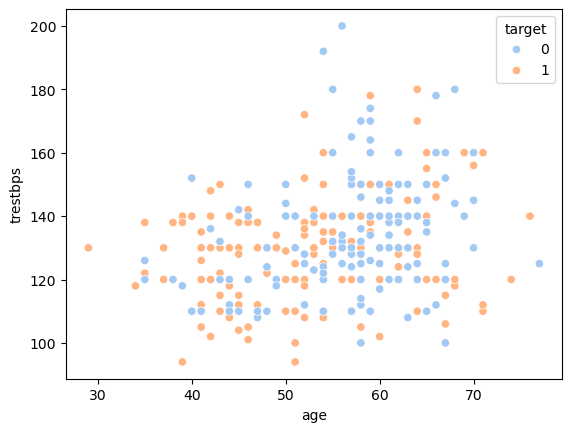

In [29]:
sns.scatterplot(x="age" , y="trestbps"  , hue = "target" , data =df)
plt.show()

# Model Building

In [31]:
# Dependent and independent Features
x = df.drop("target" , axis =1)
y = df["target"]
print("shape of x is -->> ",x.shape)
print("shape of y is -->> ",y.shape)

shape of x is -->>  (302, 13)
shape of y is -->>  (302,)


In [32]:
# Train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x,y , test_size = 0.3 , random_state =42)
# print a Shape
print(f"x_train shape is --> {x_train.shape}")
print(f"x_test shape is --> {x_test.shape}")
print(f"y_train shape is --> {y_train.shape}")
print(f"x_test shape is --> {y_test.shape}")

x_train shape is --> (211, 13)
x_test shape is --> (91, 13)
y_train shape is --> (211,)
x_test shape is --> (91,)


In [33]:
x_train.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,39,0,2,94,199,0,1,179,0,0.0,2,0,2
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2


In [34]:
x_test.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
247,66,1,1,160,246,0,1,120,1,0.0,1,3,1


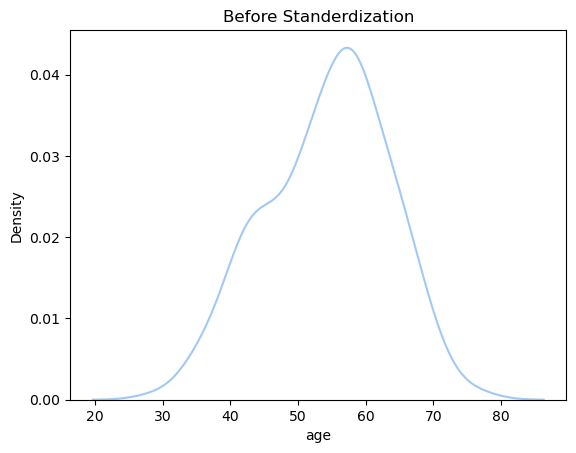

In [35]:
# Before Standardization plot "Age" Feature
sns.kdeplot(x_train["age"])
plt.title("Before Standerdization")
plt.show()

In [36]:
# Feature Scalling Unisg Standardization Method
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
x_train = pd.DataFrame(x_train , columns =["age" , "sex",	"cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope","ca", "thal"])
x_test = pd.DataFrame(x_test , columns =["age" , "sex",	"cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope","ca", "thal"])

In [38]:
x_train.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,-1.693122,-1.346601,0.939803,-2.119661,-0.861420,-0.383065,0.907886,1.305768,-0.652438,-0.897065,0.939123,-0.678627,-0.530046
1,-2.800870,0.742611,-0.018160,-0.086200,-0.769640,-0.383065,-0.988787,2.341208,-0.652438,-0.897065,0.939123,-0.678627,-0.530046
2,-0.474599,-1.346601,0.939803,-0.651050,-0.494303,-0.383065,0.907886,0.360366,-0.652438,0.514819,-0.671893,-0.678627,-0.530046
3,-0.031500,0.742611,-0.976124,0.478650,-0.127186,-0.383065,0.907886,0.450405,-0.652438,0.161848,0.939123,-0.678627,-0.530046


In [39]:
x_test.head(4)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.079275,0.742611,-0.976124,0.026770,1.965380,-0.383065,0.907886,-0.810131,1.532712,0.161848,-0.671893,0.374243,1.139203
1,1.076248,0.742611,0.939803,-0.368625,1.157723,-0.383065,0.907886,-0.855150,1.532712,0.691305,-0.671893,-0.678627,1.139203
2,0.300824,0.742611,0.939803,1.043501,-2.201396,2.610520,0.907886,1.035653,-0.652438,-0.720579,0.939123,0.374243,1.139203
3,1.297797,0.742611,-0.018160,1.608351,0.001305,-0.383065,0.907886,-1.350361,1.532712,-0.897065,-0.671893,2.479983,-2.199296


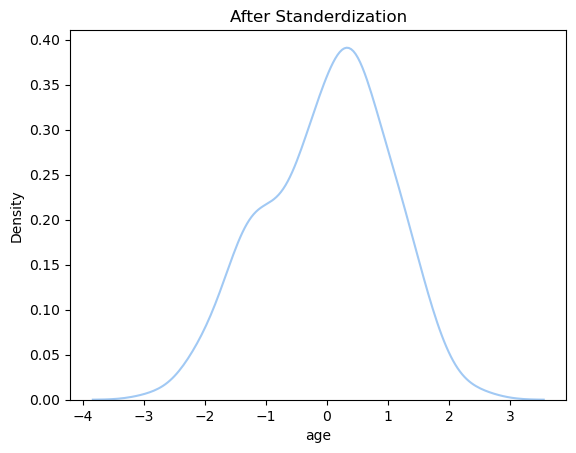

In [40]:
# After Standardization "Age" featur
sns.kdeplot(x_train["age"])
plt.title("After Standerdization")
plt.show()

#  Logistic Regression Algorithm

In [42]:
model_LR = LogisticRegression()

In [43]:
model_LR.fit(x_train , y_train)

LogisticRegression()

In [44]:
predLG = model_LR.predict(x_test)

In [45]:
scoreLG = accuracy_score(predLG , y_test)
scoreLG

0.8131868131868132

### Hyperprameter Tunning

In [47]:
# Using GridSearchCV choose Best Parameter

parameter = {"penalty":["l1" ,"l2","elasticnet" ,"None"] ,"C":[1,2,3,4,5,6,7,20,30,4,50] ,"max_iter":[100,200,300,400,500]}

In [48]:
classifier_reg = GridSearchCV(model_LR , param_grid=parameter ,scoring ="accuracy" ,cv=5)

In [49]:
classifier_reg.fit(x_train ,y_train)

C:\Users\FutureTech\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
825 fits failed out of a total of 1100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
275 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\FutureTech\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\FutureTech\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\FutureTech\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 117

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 20, 30, 4, 50],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'None']},
             scoring='accuracy')

In [50]:
print(classifier_reg.best_params_)

{'C': 4, 'max_iter': 100, 'penalty': 'l2'}


In [51]:
print(classifier_reg.best_score_)

0.8433001107419713


In [52]:
pre =classifier_reg.predict(x_test)
print("Pedicted values -->> " ,pre)

Pedicted values -->>  [0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 1 0 1 0 1
 1 1 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 1 1 0 0 0 0 1 1 1 0 0 1 1 0 1]


In [53]:
pd.DataFrame({"Actual Value" :y_test , "predicted_values":pre})
# You can see both is maximum same 

,Actual Value,predicted_values
180,0,0
229,0,0
111,1,1
247,0,0
60,1,1
...,...,...
251,0,0
19,1,1
143,1,1
79,1,0


In [54]:
score = accuracy_score(pre , y_test)
score

0.8241758241758241

In [55]:
class_report = classification_report(pre,y_test)
print(class_report)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        44
           1       0.82      0.85      0.83        47

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



## DecisionTree

In [96]:
model_DT = DecisionTreeClassifier()
model_DT.fit(x_train , y_train)

DecisionTreeClassifier()

In [98]:
predDT = model_DT.predict(x_test)

In [100]:
scoreDT = accuracy_score(predDT , y_test)
scoreDT

0.8241758241758241

In [102]:
print(classification_report(predDT , y_test))

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        44
           1       0.82      0.85      0.83        47

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



# RandomForestClassifier

In [58]:
model_RFC= RandomForestClassifier()
model_RFC.fit(x_train , y_train)

RandomForestClassifier()

In [59]:
predRFC =model_RFC.predict(x_test)

In [60]:
scorerfc = accuracy_score(predRFC , y_test)
scorerfc

0.8571428571428571

### Hyperparameter tun RFC

In [70]:
criterion=["gini", "entropy", "log_loss"]
max_depth = [1,2,3,4,5,6]
min_samples_leaf =[1,2,3,4,5]
max_features = ['sqrt', 'log2', None]
ccp_alpha = [0.0 , 0.5 , 1.0 ,1.5 ,2.0]

In [75]:
parametersRFC = {"criterion":criterion , "max_depth":max_depth , "min_samples_leaf":min_samples_leaf,
                "max_features" :max_features ,"ccp_alpha":ccp_alpha}

In [77]:
rfrCV = GridSearchCV (estimator=model_RFC , param_grid=parametersRFC ,  scoring ="accuracy", cv =5 )
rfrCV.fit(x_train , y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.5, 1.0, 1.5, 2.0],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5]},
             scoring='accuracy')

In [79]:
print(rfrCV.best_params_)

{'ccp_alpha': 0.0, 'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 1}


In [81]:
print(rfrCV.best_score_)

0.8575858250276855


In [91]:
predRFCV = rfrCV.predict(x_test)

In [93]:
scoreRFRCV = accuracy_score(predRFCV , y_test)
scoreRFRCV

0.8571428571428571